# Physics 404/604

## Computational Physics (Spring 2018)

## BPB-250, Mon./Wed. 2:30-3:45 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |

# Fourier Transform

## Aliasing

The sampling of a signal by Discrete Fourier Transform for only a finite number of times limits
the accuracy of the deduced high-frequency components present in the signal. If you want high frequency
information, you need high frequency sampling. 

Unfortunately, the inaccurate high frequency components can contaminate the low frequency components of the
signal. This is called aliasing. It is also the cause of the Moire pattern (artifical pattern due to the interference
of high frequency patterns) in digital images
https://en.wikipedia.org/wiki/Moir%C3%A9_pattern

![Textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig12_2.png)

If the signal is the red curve but we only sample the red dots, we will mistakenly think the black curve is the signal. This produces the artificial low frequency mode. 

More precisely, aliasing occurs when a signal containing frequency f is sampled at a rate of s measurements per
unit time with s$\leq$f/2. In this case, the frequencies f and f-2s yield the same DFT. We cannot tell them apart. 
Or the derived frequency based on the sample has two components f and s-f.
To avoid aliasing we want no frequeices f>s/2 to be in the input signal. This is known as the Nyquist criterion. In practice, filtering the signal is performed beforehand. 

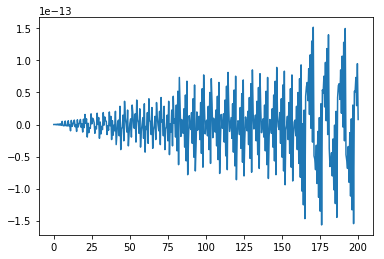

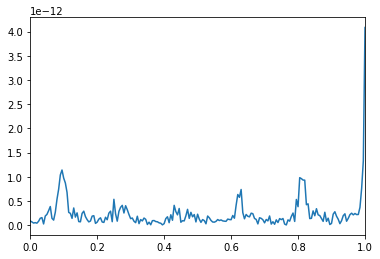

In [13]:

# DFTcomplex.py:  Discrete Fourier Transform with built in complex
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 400;                  Np = N                           
signal = zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

step = 0.5    # 1) Please try different step value to verify Nyquist frequency

def f(signal):                                                  # Signal        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = sin(2.*pi*x) # 2) sin(pi/2.*x)+sin(2.*pi*x) try this new function to verify Nyquist frequency
        xa[i] = x                   
        x += step
        
      
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)           
      dftz[n] = zsum * sq2pi      
      nplot[n] = n/N/step
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)

f(signal);       
fourier(dftz)              # Call signal, transform
plt.plot(xa,signal)
plt.show()
plt.plot(nplot,fplot)
plt.xlim([0.,1.])
plt.show()



## Filtering Noisy Signals

You measure a signal y(t) that contains noise. Your job is to determine the frequencies that
would be present in the spectrum of the signal if the signal did not contain noise.

Two methods:

1) autocorrelation function

2) filters

### Autocorrelation Function
The true signal is
\begin{equation}
y(t)=s(t)+n(t)
\end{equation}
where s(t) is the true signal, while n(t) is the noise. 
Noise should be a random process and should not be correlated with the signal.
(correlated means that one's peak is also another one's peak or trough). An analytic measure
of the correlation of two arbitrary functions y(t) and x(t) is the correlation function
\begin{equation}
c(\tau)=\int_{-\infty}^{\infty}dt y^{*}(t)x(t+\tau)=\int_{-\infty}^{\infty}dt y^{*}(t-\tau)x(t)
\end{equation}
where $\tau$ is called the lag time and is a variable. If both signals have similar time dependence,
c will be positive at some $\tau$. It can be shown that
\begin{equation}
C(\omega)=\sqrt{2\pi}Y^{*}(\omega)X(\omega)
\end{equation}
where 
\begin{equation}
c(\tau)=\int_{-\infty}^{\infty}d\omega C(\omega)\frac{e^{i\omega \tau}}{\sqrt{2\pi}}
\end{equation}
Basically, the Fourier transform of the correlation function between two signals is proportional to 
the product of the transform of one signal and the complex conjugate of the transform of the other.

If a signal correlates with itself, it is called the autocorrelation function 
\begin{equation}
A(\tau)=\int_{-\infty}^{\infty}dt y^{*}(t)y(t+\tau)=\int_{-\infty}^{\infty}dt y^{*}(t-\tau)y(t)
\end{equation}
This is also called the convolution. It will remove noise.
To see how that works, let's remind ourself: y(t)=s(t)+n(t) and
y(t+$\tau$)=s(t+$\tau$)+n(t+$\tau$). So we have
\begin{equation}
A(\tau)=\int_{-\infty}^{\infty}dt (s(t)s(t+\tau)+s(t)n(t+\tau)+n(t)s(t+\tau)+n(t)n(t+\tau))
\end{equation}
If the noise is truely random and varies much faster than the s(t), the averaged value should be zero.
We then have
\begin{equation}
A(\tau)=\int_{-\infty}^{\infty}dt s(t)s(t+\tau)=A_{s}(\tau)
\end{equation}
Considering
\begin{equation}
A(\omega)=A_{s}(\omega)=\sqrt{2\pi}|S(\omega)|^{2}
\end{equation}

Thus, evaluating the autocorrelation function of the noisy signal gives us the
pure signal's power spectrum. 

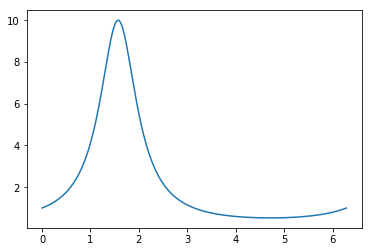

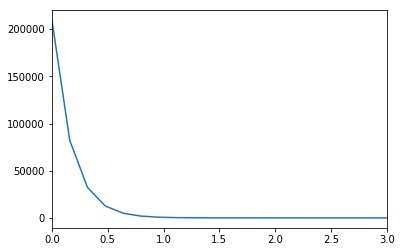

In [14]:
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 500;                  Np = N                           
signal = zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

step = 2.*pi/N

def f(signal):                                                  # Signal        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = 1./(1.-0.9*sin(x))
        xa[i] = x    m m               
        x += step
        
      
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)           
      dftz[n] = zsum * sq2pi      
      nplot[n] = n/N/step
      fplot[n] = dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real

f(signal);       
fourier(dftz)              # Call signal, transform
plt.plot(xa,signal)
plt.show()
plt.plot(nplot,fplot)
plt.xlim([0.,3.])
plt.show()

### Now let's add some noise to the data

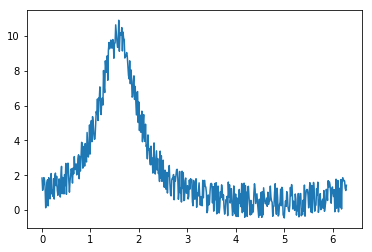

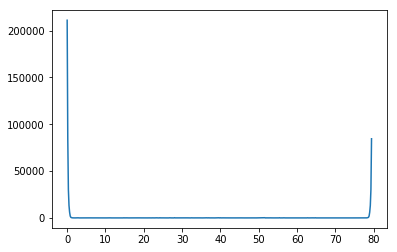

In [3]:
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 500;                  Np = N                           
signal = zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

step = 2.*pi/N

def f(signal):                                                  # Signal        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = 1./(1.-0.9*sin(x))+1.*(2.*random.random()-1)
        xa[i] = x                   
        x += step
        
      
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)           
      dftz[n] = zsum * sq2pi      
      nplot[n] = n/N/step
      fplot[n] = dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real

f(signal);       
fourier(dftz)              # Call signal, transform
plt.plot(xa,signal)
plt.show()
plt.plot(nplot,fplot)
plt.show()

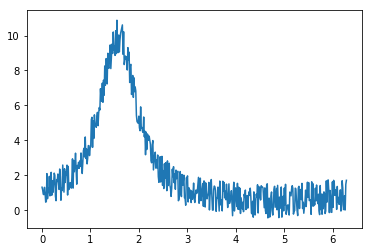

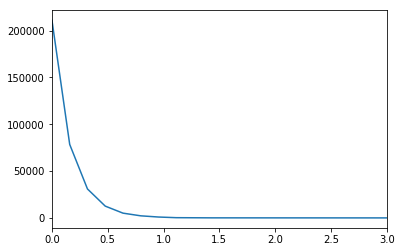

In [15]:
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 500;                  Np = N                           
signal = zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

step = 2.*pi/N

def f(signal):                                                  # Signal        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = 1./(1.-0.9*sin(x))+1.*(2.*random.random()-1)
        xa[i] = x                   
        x += step

     
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += aut[k]*exp(-zexpo)           
      dftz[n] = zsum * sq2pi      
      nplot[n] = n/N/step
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)

f(signal);    
aut = zeros( (N+1), float ) 
for i in range(0,N+1):
    aut[i]=sum(roll(signal,i)*signal)

fourier(dftz)              # Call signal, transform
plt.plot(xa,signal)
plt.show()
plt.plot(nplot,fplot/sqrt(2.*pi))
plt.xlim([0.,3.])
plt.show()

### Filtering

We can convert an input signal f(t) to an output signal g(t) using convolution
\begin{equation}
g(t)=\int_{-\infty}^{\infty}d\tau f(\tau)h(t-\tau)\equiv f(t)*h(t)
\end{equation}
h(t) is called the response or transfer function of the filter
\begin{equation}
h(t)=\int_{-\infty}^{\infty}d\tau \delta(\tau)h(t-\tau)
\end{equation}
h(t) is the response of the filter to a unit impulse.
The response must equal zero for $\tau>t$
because events in the future cannot affect the present.

With convolution theorem we have
\begin{equation}
G(\omega)=\sqrt{2\pi}F(\omega)H(\omega)
\end{equation}

High-pass filters (remove low frequency) and Low-pass filters (remove high frequency).

For the low-pass filter, we want to have a cut-off frequency $\omega_{c}$ and filter will
remove all frequency above $\omega_{c}$
\begin{equation}
H(\omega,\omega_{c})=rect(\frac{\omega}{2\omega_{c}}), \quad rect(\omega)=1 \, if\, |\omega|<1/2
\end{equation}
The Fourier transfor of this is 
\begin{equation}
\frac{sin(\omega_{c} t)}{\omega_{c} t}
\end{equation}

This introduces several problems: 1) this filter is noncausal, 2) we need to sample the infinite amount of time.
So normally people use 
\begin{equation}
h[i]=\frac{sin[2\pi\omega_{c}(i-M/2)]}{i-M/2}\left[0.54-0.46 cos\left(
\frac{2\pi i}{M}\right)\right], 0<t<M
\end{equation}

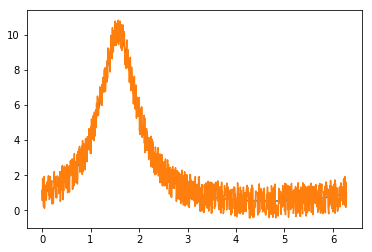

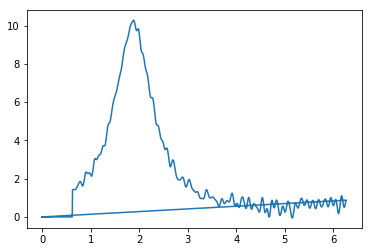

In [16]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# NoiseSincFilter.py
from numpy import *
import matplotlib.pyplot as plt                                         # complex math   
import random

max = 1000
ps = zeros((max),float)
step = 2*math.pi/1000
xa = zeros((max),float) 
f = zeros((max),float) 
array = zeros((max),float)

def function(array,max):
    
    step = 2*pi/max; x = 0. 
    for i in range(0,max):
        f[i] = 1/(1. - 0.9*sin(x))                             # Function
        array[i] = (1/(1-0.9*sin(x)))+1.0*(2.*random.random()-1)  # Noise
        xa[i] = x
        x += step
		
        
y = zeros((max),float)
h = zeros((max),float)
jar = zeros((max),float)

def filter():                           # Low-pass windowed sinc filter
    
    step = 2*pi/max
    m = 100                                          # Set filter length
    fc = .07   
    for i in range(0,100):                             # Low-pass filter
        if ((i-(m/2)) == 0):  h[i] = 2*pi*fc 
        if ((i-(m/2))!= 0):   h[i] = sin(2*pi*fc*(i-m/2))/(i-m/2)
        h[i] = h[i]*(0.54 - 0.46*cos(2*pi*i/m))         # Hamming window
    sum = 0.                                 # Normalize low-pass filter
    for i in range(0,100):  sum = sum + h[i]
    for i in range(0,100):  h[i] = h[i] / sum 
    for j in range(100,max-1):               # Convolute input + filter
        y[j] = 0.                    
        for i in range(0,100): y[j] = y[j] + array[j-i] * h[i]
    for j in range(0,max-1):  jar[j]= j*step

function(array, max)                                       
filter()      
        
plt.plot(xa,f)
plt.plot(xa,array)
plt.show()
plt.plot(jar,y)
plt.show()
        
                                               

## The Fast Fourier Transform

We talked about the way to do DFT is 
\begin{equation}
Y_{n}=\frac{1}{\sqrt{2\pi}}\sum_{k=1}^{N} y_{k}Z^{nk}, n=0,1,...,N-1
\end{equation}

n and k both changes from 0 to N-1, so it requires N$^2$ multiplications
and additions of complex numbers. 

In 1965, Cooley and Tukey discovered an algorithm that reduces
the time from $N^2$ to Nlog$_{2}$N. 100 fold speed up for 1000 data points,
FFT is one of the 10 most important algorithms of all time.

https://en.wikipedia.org/wiki/Cooley–Tukey_FFT_algorithm



In [27]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# FFT.py:  FFT for complex numbers in dtr[][2], returned in dtr

from numpy import *
from sys import version 
max = 2100                 
points = 1026                                          # Can be increased
data = zeros((max), float) 
dtr  = zeros((points,2), float)
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (max), complex ) 

def fft(nn,isign):                                      # FFT of dtr[n,2]
    n = 2*nn
    for i in range(0,nn+1):                # Original data in dtr to data
         j = 2*i+1
         data[j] = dtr[i,0]                       # Real dtr, odd data[j]
         data[j+1] = dtr[i,1]                  # Imag dtr, even data[j+1]
    j = 1                           # Place data in bit reverse order
    for i in range(1,n+2, 2):
        if (i-j) < 0 :                # Reorder equivalent to bit reverse
            tempr = data[int(j)]
            tempi = data[int(j+1)]
            data[int(j)] = data[int(i)]
            data[int(j+1)] = data[i+1]
            data[i] = tempr
            data[i+1] = tempi 
        m = n/2;
        while (m-2 > 0): 
            if  (j-m) <= 0 :
                break
            j = j-m
            m = m/2
        j = j+m;
                               
    print(" Bit-reversed data ")
  
    for i in range(1, n+1, 2):
        print("%2d  data[%2d]  %9.5f "%(i,i,data[i]))    # To see reorder
    mmax = 2
    while (mmax-n) < 0 :                                # Begin transform
       istep = 2*mmax
       theta = 6.2831853/(1.0*isign*mmax)
       sinth = math.sin(theta/2.0)
       wstpr = -2.0*sinth**2
       wstpi = math.sin(theta)
       wr = 1.0
       wi = 0.0
       for m in range(1,mmax +1,2):  
           for i in range(m,n+1,istep):
               j = i+mmax
               tempr = wr*data[j]   -wi *data[j+1]
               tempi = wr*data[j+1] +wi *data[j]
               data[j]   = data[i]   -tempr
               data[j+1] = data[i+1] -tempi
               data[i]   = data[i]   +tempr
               data[i+1] = data[i+1] +tempi        
           tempr = wr
           wr = wr*wstpr - wi*wstpi + wr
           wi = wi*wstpr + tempr*wstpi + wi;
       mmax = istep              
    for i in range(0,nn):
        j = 2*i+1
        dtr[i,0] = data[j]
        dtr[i,1] = data[j+1] 
        
nn = 512                                                     # Power of 2
isign = -1                           # -1 transform, +1 inverse transform
print('        INPUT')
print("  i   Re part   Im  part")
for i in range(0,nn ):                                       # Form array
    dtr[i,0] = 1.0*i                                          # Real part
    dtr[i,1] = 1.0*i                                            # Im part
    print(" %2d %9.5f %9.5f" %(i,dtr[i,0],dtr[i,1]))
fft(nn, isign)                             # Call FFT, use global dtr[][]
print('    Fourier transform')
print("  i      Re      Im    ")
for i in range(0,nn):  
    print(" %2d  %9.5f  %9.5f "%(i,dtr[i,0],dtr[i,1]))
    
sq2pi=1./sqrt(2.*pi)
def fourier(dftz):                                              # DFT
    for n in range(0, nn):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, nn):                              
          zexpo = complex(0, twopi*k*n/nn)           # Complex exponent
          zsum += complex(k,k)*exp(-zexpo)           
      dftz[n] = zsum       
      print(n,dftz[n].real,dftz[n].imag)
    
fourier(dftz)
print("Enter and return any character to quit")

        INPUT
  i   Re part   Im  part
  0   0.00000   0.00000
  1   1.00000   1.00000
  2   2.00000   2.00000
  3   3.00000   3.00000
  4   4.00000   4.00000
  5   5.00000   5.00000
  6   6.00000   6.00000
  7   7.00000   7.00000
  8   8.00000   8.00000
  9   9.00000   9.00000
 10  10.00000  10.00000
 11  11.00000  11.00000
 12  12.00000  12.00000
 13  13.00000  13.00000
 14  14.00000  14.00000
 15  15.00000  15.00000
 16  16.00000  16.00000
 17  17.00000  17.00000
 18  18.00000  18.00000
 19  19.00000  19.00000
 20  20.00000  20.00000
 21  21.00000  21.00000
 22  22.00000  22.00000
 23  23.00000  23.00000
 24  24.00000  24.00000
 25  25.00000  25.00000
 26  26.00000  26.00000
 27  27.00000  27.00000
 28  28.00000  28.00000
 29  29.00000  29.00000
 30  30.00000  30.00000
 31  31.00000  31.00000
 32  32.00000  32.00000
 33  33.00000  33.00000
 34  34.00000  34.00000
 35  35.00000  35.00000
 36  36.00000  36.00000
 37  37.00000  37.00000
 38  38.00000  38.00000
 39  39.00000  39.00000
 

671  data[671]  485.00000 
673  data[673]   21.00000 
675  data[675]  277.00000 
677  data[677]  149.00000 
679  data[679]  405.00000 
681  data[681]   85.00000 
683  data[683]  341.00000 
685  data[685]  213.00000 
687  data[687]  469.00000 
689  data[689]   53.00000 
691  data[691]  309.00000 
693  data[693]  181.00000 
695  data[695]  437.00000 
697  data[697]  117.00000 
699  data[699]  373.00000 
701  data[701]  245.00000 
703  data[703]  501.00000 
705  data[705]   13.00000 
707  data[707]  269.00000 
709  data[709]  141.00000 
711  data[711]  397.00000 
713  data[713]   77.00000 
715  data[715]  333.00000 
717  data[717]  205.00000 
719  data[719]  461.00000 
721  data[721]   45.00000 
723  data[723]  301.00000 
725  data[725]  173.00000 
727  data[727]  429.00000 
729  data[729]  109.00000 
731  data[731]  365.00000 
733  data[733]  237.00000 
735  data[735]  493.00000 
737  data[737]   29.00000 
739  data[739]  285.00000 
741  data[741]  157.00000 
743  data[743]  413.00000 
7

85 -701.5068507148397 189.5068507147381
86 -695.2456629237081 183.2456629236617
87 -689.1149392798462 177.11493927974925
88 -683.110196629527 171.1101966293029
89 -677.2271527892952 165.22715278932537
90 -671.4617153773605 159.46171537742362
91 -665.809971379883 153.80997137982195
92 -660.2681773979917 148.26817739808473
93 -654.8327505246989 142.83275052477154
94 -649.5002598046906 137.50025980462
95 -644.267418230246 132.26741823016437
96 -639.1310752433111 127.13107524232657
97 -634.0882096890546 122.08820968885084
98 -629.1359232222258 117.13592322203863
99 -624.2714340884106 112.27143408807945
100 -619.4920712945504 107.49207129445836
101 -614.7952691218081 102.79526912178505
102 -610.1785619591724 98.17856195901857
103 -605.6395794383651 93.63957943849255
104 -601.1760418524345 89.17604185228811
105 -596.7857558315529 84.78575583168288
106 -592.4666102662624 80.4666102658091
107 -588.216572458757 76.21657245888696
108 -584.0336844893238 72.0336844895237
109 -579.9160597789748 67.